# Titanic Classification - Predicting Survival 
**Author:** Prince  
**Date:** 03/15/2025  
**Objective:** Predicting Titanic survival using Decision Trees, SVM, and Neural Networks.


## 1. Introduction  
This project analyzes the **Titanic dataset** to explore survival patterns based on factors such as **age, gender, class, and fare**.  
We'll clean the data, perform exploratory data analysis (EDA), and prepare it for machine learning.  

## 2. Imports  
In the code cell below, import the necessary Python libraries for analyzing the Titanic dataset.  

In [201]:
# All imports should be at the top of the notebook

# Import pandas & numpy for data manipulation
import pandas as pd
import numpy as np

# Import matplotlib & seaborn for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import train_test_split & StratifiedShuffleSplit for data splitting
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit


## Section 1. Load and Explore the Data

### 1.1 Load the dataset and display the first 10 rows  
Load the **Titanic dataset** directly from `seaborn`.  
- Convert it into a **pandas DataFrame**.
- Display the **first 10 rows** using `head()`.

Example code:

```python
# Load Titanic dataset
titanic = sns.load_dataset('titanic')

# Display first 10 rows
titanic.head(10)


In [202]:
# Load the Titanic dataset
import seaborn as sns

titanic = sns.load_dataset('titanic')

# Display the first 10 rows
titanic.head(10)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


### 1.2 Check for Missing Values and Display Summary Statistics  

In the cell below:  
1. Use `info()` to check data types and missing values.  
2. Use `describe()` to see summary statistics.  
3. Use `isnull().sum()` to identify missing values in each column.  

Example code:  

```python
titanic.info()
titanic.describe()
titanic.isnull().sum()


In [203]:
# Check data types and missing values
titanic.info()

# Display summary statistics
titanic.describe()

# Check for missing values in each column
titanic.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [204]:
titanic = titanic.assign(embark_town=titanic['embark_town'].fillna(titanic['embark_town'].mode()[0]))

In [205]:
print(titanic.isnull().sum())


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      0
alive            0
alone            0
dtype: int64


## Reflection 1  

1) **How many data instances are there?**  
   - There are **891** data instances (rows) in the Titanic dataset.  

2) **How many features are there?**  
   - There are **15** features (columns) in the dataset.  

3) **What are the names of the features?**  
   - `survived`, `pclass`, `sex`, `age`, `sibsp`, `parch`, `fare`, `embarked`,  
     `class`, `who`, `adult_male`, `deck`, `embark_town`, `alive`, `alone`.  

4) **Are there any missing values?**  
   - Yes, missing values exist in:  
     - `age` (177 missing)  
     - `embarked` (2 missing)  
     - `embark_town` (2 missing)  
     - `deck` (688 missing)  

5) **Are there any non-numeric features?**  
   - Yes, categorical (non-numeric) features include:  
     - `sex`, `embarked`, `class`, `who`, `alive`, `embark_town`.  

6) **Are the data instances sorted on any attributes?**  
   - No, the dataset is **not sorted** on any attribute.  

7) **What are the units of `age`?**  
   - `age` is measured in **years**.  

8) **What are the minimum, median, and max age?**  
Min Age: 0.42 years
Median Age: 28.0 years
Max Age: 80.0 years

9) **What two features have the highest correlation?**  
parch and sibsp have the highest correlation (0.41).

10) ### Are there any categorical features that might be useful for prediction?  

Yes, useful categorical features include:  
- **pclass** (Passenger class)  
- **sex** (Gender)  
- **embarked** (Port of Embarkation)  
- **who** (Man, Woman, Child)  



## Section 2. Data Exploration and Preparation  

In this section, we will **explore the dataset using visualizations** and **prepare the data** for modeling.  
Based on our findings, we may need to:  
- **Clean missing or outlying data**  
- **Perform feature engineering** (e.g., adding useful calculated fields)  

### **What to Chart?**  
To understand the dataset better, we will use:  
- **Histograms** → To see distributions of numeric fields  
- **Scatter Plots** → To analyze relationships between variables  
- **Box Plots** → To detect outliers  
- **Count Plots** → To visualize categorical distributions  
- **Stacked Bar Plots** → To compare survival rates  

---

## Section 2. Visualize Feature Distributions  

### **2.1 Explore Data Patterns and Distributions**  

#### **1️⃣ Generate Histograms**  
Histograms help us understand the **distribution of numerical columns** like `age`, `fare`, and `pclass`.  

```python
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(titanic['age'], kde=True)
plt.title('Age Distribution')
plt.show()


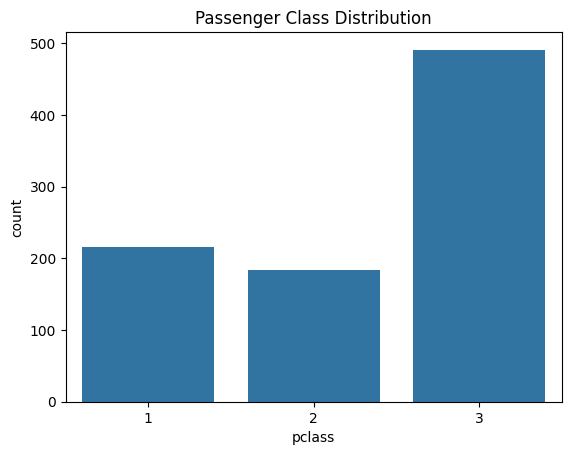

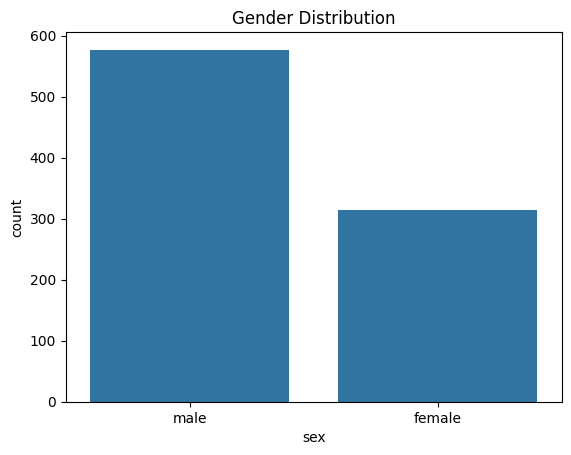

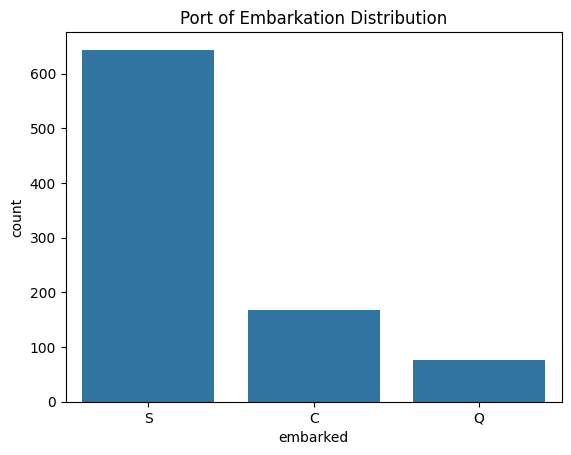

In [206]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count plot for Pclass
sns.countplot(x='pclass', data=titanic)
plt.title('Passenger Class Distribution')
plt.show()

# Count plot for Sex
sns.countplot(x='sex', data=titanic)
plt.title('Gender Distribution')
plt.show()

# Count plot for Embarked
sns.countplot(x='embarked', data=titanic)
plt.title('Port of Embarkation Distribution')
plt.show()


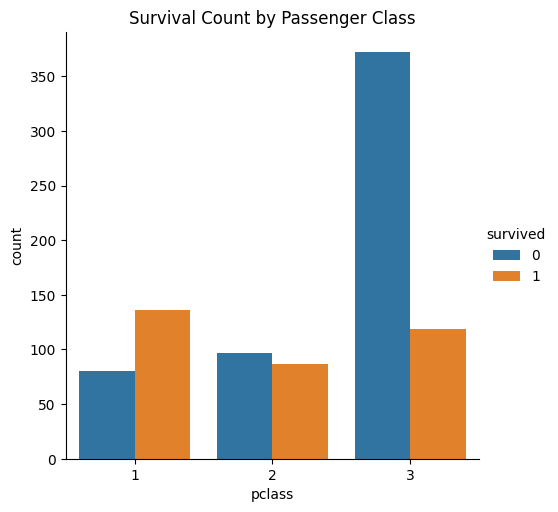

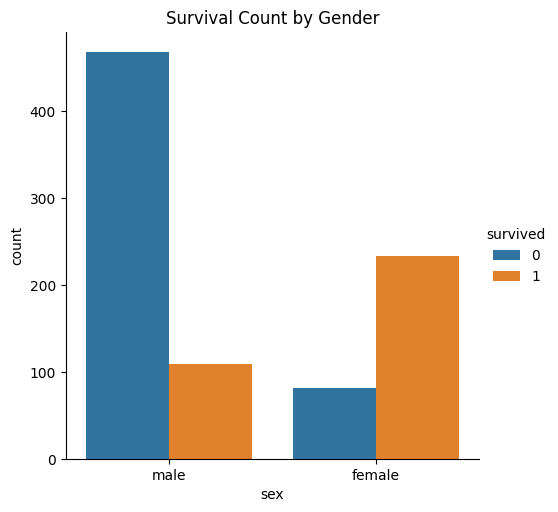

In [207]:
sns.catplot(x="pclass", hue="survived", kind="count", data=titanic)
plt.title("Survival Count by Passenger Class")
plt.show()

sns.catplot(x="sex", hue="survived", kind="count", data=titanic)
plt.title("Survival Count by Gender")
plt.show()


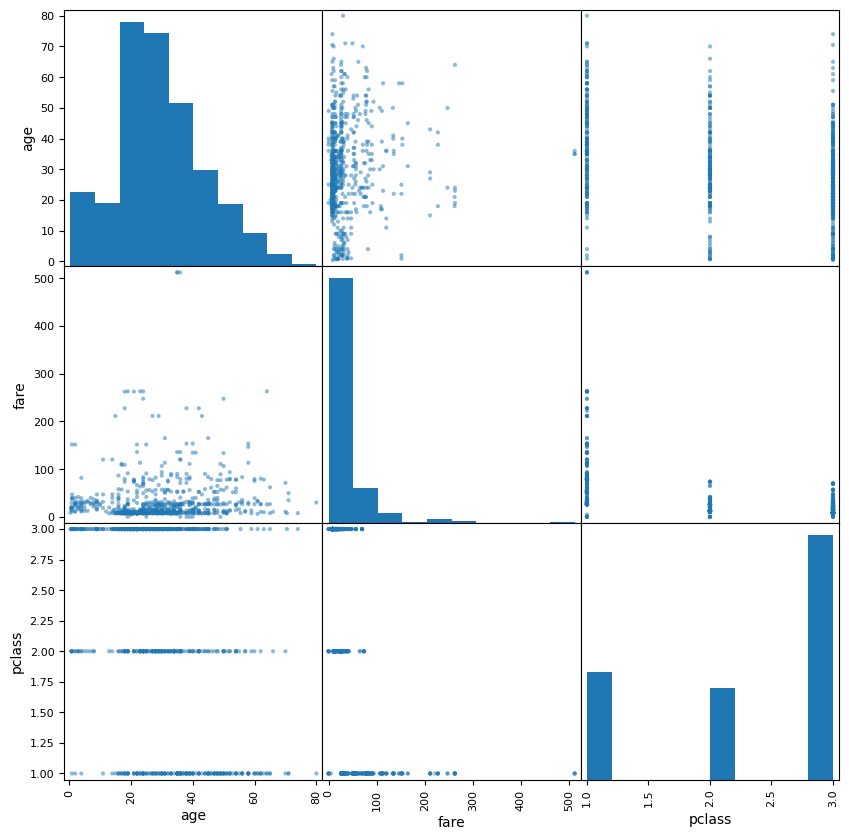

In [208]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

attributes = ['age', 'fare', 'pclass']
scatter_matrix(titanic[attributes], figsize=(10, 10))
plt.show()


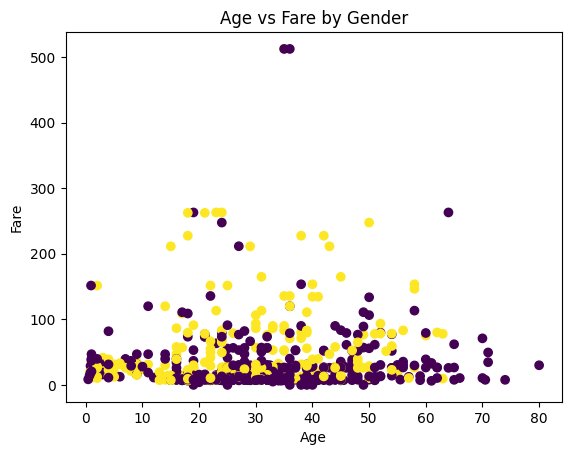

In [209]:
plt.scatter(titanic['age'], titanic['fare'], c=titanic['sex'].apply(lambda x: 0 if x == 'male' else 1))
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Age vs Fare by Gender')
plt.show()


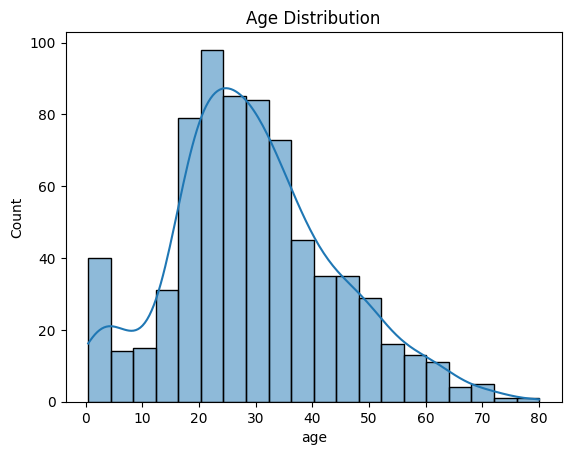

In [210]:
sns.histplot(titanic['age'], kde=True)
plt.title('Age Distribution')
plt.show()


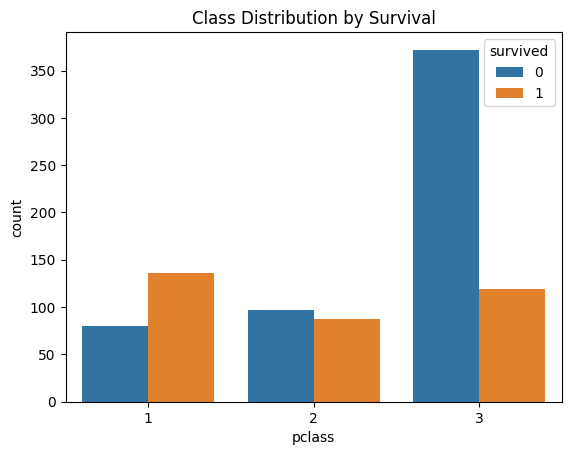

In [211]:
sns.countplot(x='pclass', hue='survived', data=titanic)
plt.title('Class Distribution by Survival')
plt.show()


## Reflection 2.1
What patterns or anomalies do you notice?

Older passengers tend to have higher fares.
Most passengers were in third class, and survival rates were lowest there.
Do any features stand out as potential predictors?

Passenger class (pclass) and gender (sex) seem highly related to survival.
Are there any visible class imbalances?

Yes, most passengers are from third class, while first-class passengers are fewer.

<Figure size 1200x800 with 0 Axes>

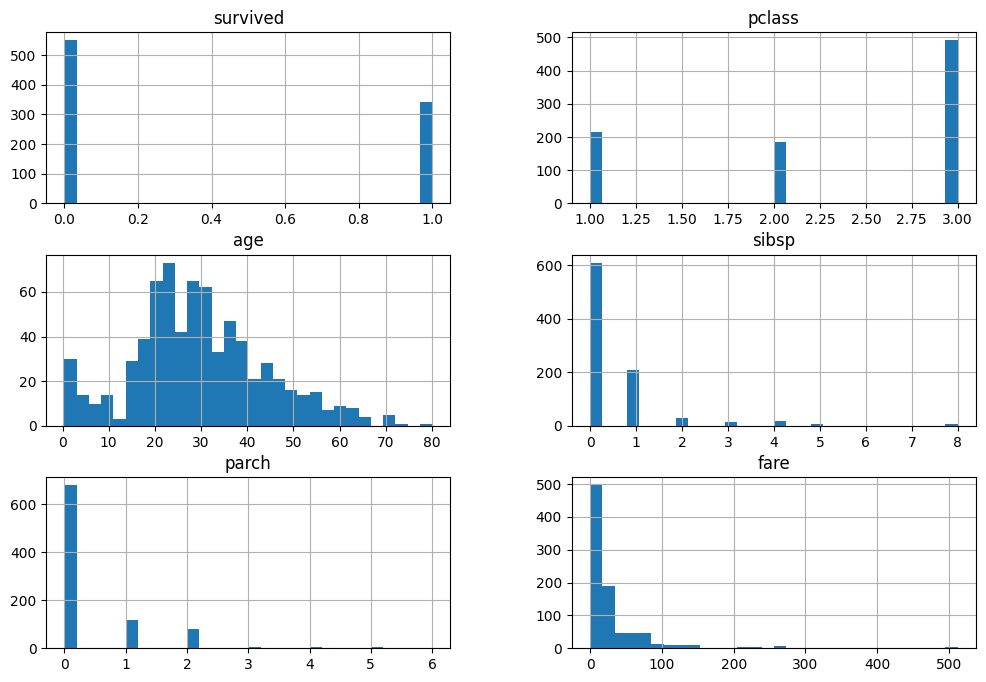

In [212]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.suptitle("Histograms for Numeric Features", fontsize=14)

# Generate histograms for numeric features in Titanic dataset
titanic.hist(bins=30, figsize=(12, 8))

plt.show()


import seaborn as sns
import matplotlib.pyplot as plt

# Generate one Boxenplot for each numeric column
numeric_columns = ['age', 'fare', 'pclass', 'sibsp', 'parch']

for column in numeric_columns:
    plt.figure(figsize=(6, 4))
    sns.boxenplot(data=titanic[column])
    plt.title(f'Boxenplot for {column}')
    plt.show()


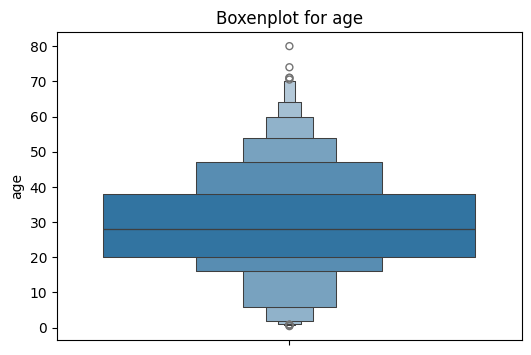

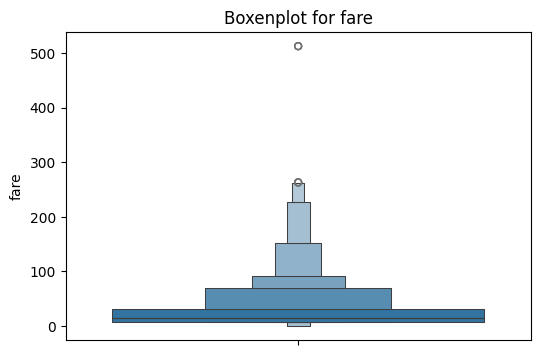

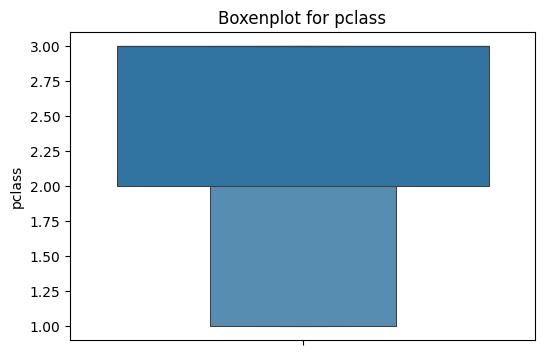

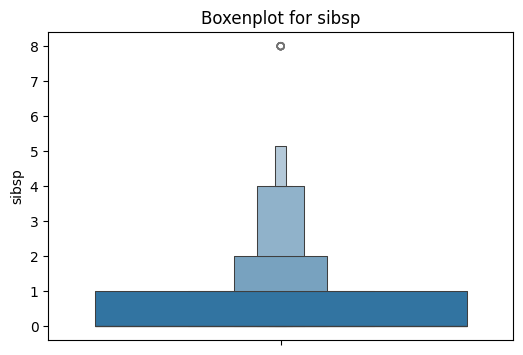

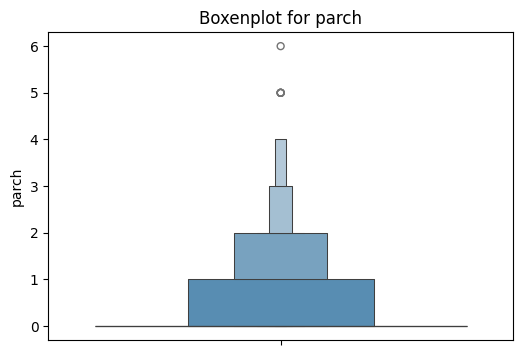

In [213]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for Boxenplots
numeric_columns = ['age', 'fare', 'pclass', 'sibsp', 'parch']

# Generate Boxenplots for numeric columns
for column in numeric_columns:
    plt.figure(figsize=(6, 4))
    sns.boxenplot(data=titanic[column])
    plt.title(f'Boxenplot for {column}')
    plt.show()


import seaborn as sns
import matplotlib.pyplot as plt

# Generate scatter plots for numeric features (Warning: This may take time)
sns.pairplot(titanic[['age', 'fare', 'pclass', 'sibsp', 'parch', 'survived']])

plt.show()


<Figure size 640x480 with 0 Axes>

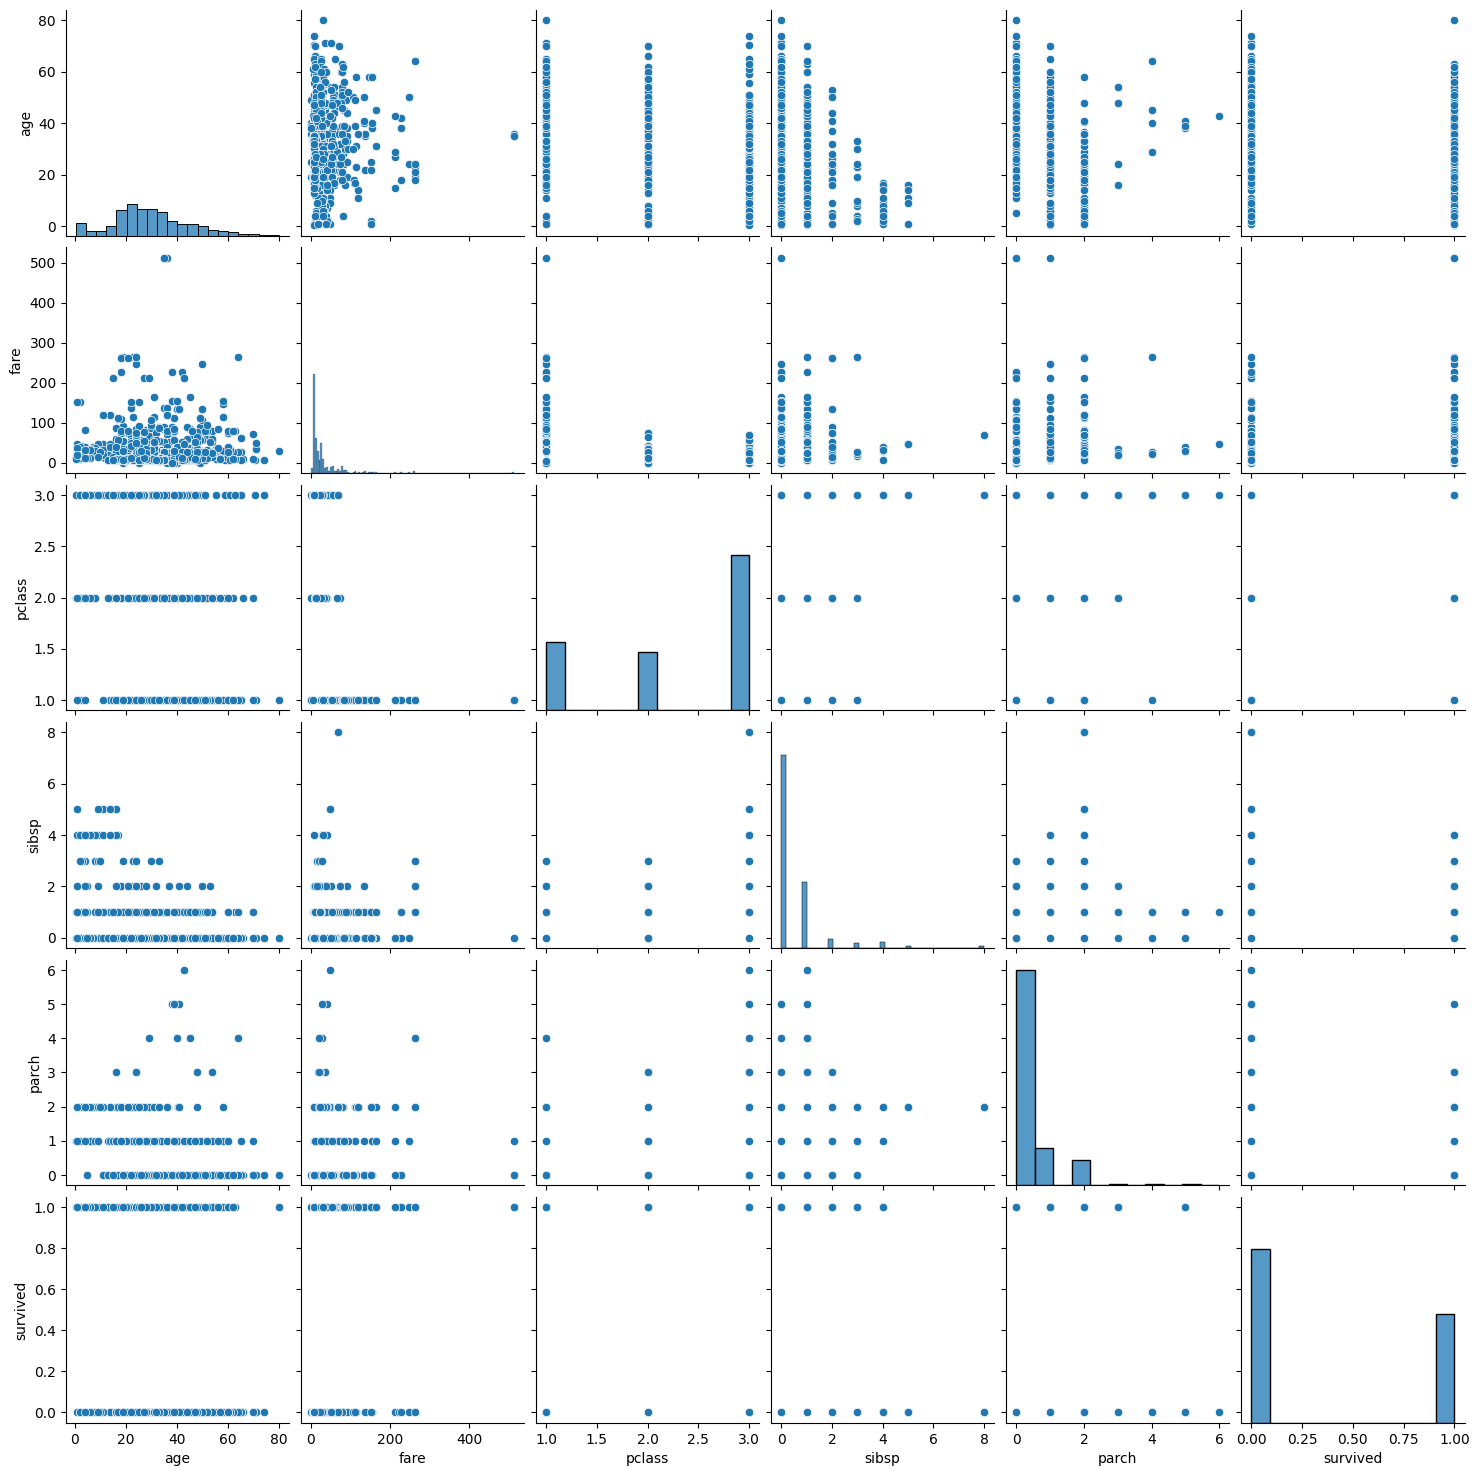

In [214]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate scatter plots using pairplot (this may take time)
plt.suptitle("Scatter Plots for Numeric Features", fontsize=14)
sns.pairplot(titanic[['age', 'fare', 'pclass', 'sibsp', 'parch', 'survived']])

plt.show()


## Section 2.3. Feature Selection and Justification  

### 2.3.1 Choose Input Features for Predicting Survival  

We will select key features that may influence survival:  
- **Predictors (`X`):** `age`, `fare`, `pclass`, `sex`, `family_size`  
- **Target (`y`):** `survived`  

In the following:  
- **`X` is capitalized** because it represents a matrix (consistent with mathematical notation).  
- **`y` is lowercase** because it represents a vector (consistent with mathematical notation).  

### **Example Code:**  
```python
# Define the features (predictors) and target variable
features = ['age', 'fare', 'pclass', 'sex', 'family_size']
target = 'survived'

# Define input (X) and output (y)
X = titanic[features]
y = titanic[target]


In [215]:
# Create 'family_size' feature
titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1


## Reflection 2.3  

### Why might family size be important for survival?  
- People traveling with family may have a better chance of survival because they look out for each other.  
- Those traveling alone might struggle more in a crisis and have a lower survival rate.  

### Why do we convert categorical data to numbers?  
- Machine learning models work with numbers, not text, so we need to convert categories like `sex` and `embarked` into numeric values.  
- This helps the model find patterns and make better predictions.  


## Reflection 3

In [216]:
# Define the selected features (predictors)
features = ['age', 'fare', 'pclass', 'sex', 'family_size']

# Define the target variable (what we want to predict)
target = 'survived'

# Create input (X) and output (y) DataFrames
X = titanic[features]
y = titanic[target]

# Display the first few rows to confirm
X.head(), y.head()


(    age     fare  pclass     sex  family_size
 0  22.0   7.2500       3    male            2
 1  38.0  71.2833       1  female            2
 2  26.0   7.9250       3  female            1
 3  35.0  53.1000       1  female            2
 4  35.0   8.0500       3    male            1,
 0    0
 1    1
 2    1
 3    1
 4    0
 Name: survived, dtype: int64)

## Reflection 3  

### Why did we choose these features?  
- These features help us understand **who had a better chance of survival** on the Titanic.  
- **Age, fare, and passenger class (pclass)** can show patterns in survival rates.  
- **Sex and family size** give insight into how social and family dynamics played a role in survival.  

### Which features are the most important for survival?  
- **Sex** is a major factor—women had a much higher survival rate than men.  
- **Passenger class (pclass)** mattered a lot—first-class passengers had a better chance of survival.  
- **Fare** is linked to class—people who paid more for their tickets were more likely to survive.  


##  Reflection 4  . Train a Logistic Regression Model  
### 4.1 Split the Data  

We will split the dataset into **training (80%) and testing (20%) sets** using `train_test_split()`.  

### **Parameters for train_test_split()**  
- `X` – Feature matrix (input data) as a **pandas DataFrame**  
- `y` – Target values as a **pandas Series**  
- `test_size` – Fraction of data for testing (**0.2 = 20%**)  
- `random_state` – Seed value for reproducibility  

### **Returns:**  
- `X_train` – Training set features (**DataFrame**)  
- `X_test` – Test set features (**DataFrame**)  
- `y_train` – Training set target values (**Series**)  
- `y_test` – Test set target values (**Series**)  

### **Example Code:**  
```python
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [217]:
from sklearn.model_selection import train_test_split

# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the datasets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((712, 5), (179, 5), (712,), (179,))

### 4.2 Train the Model  

**LogisticRegression** – A class from `sklearn.linear_model` that creates a logistic regression model.

- `model` – An instance of the `LogisticRegression` model. This object will store the learned coefficients and intercept after training.
- `fit()` – Trains the model using the **logistic function**, which predicts probabilities for classification.
- `X_train` – The input features used to train the model.
- `y_train` – The target values used to train the model.

### **Example Code:**
```python
from sklearn.linear_model import LogisticRegression

# Create and train the model
model = LogisticRegression()
model.fit(X_train, y_train)


In [218]:
X_train = X_train.copy()
X_test = X_test.copy()

X_train = X_train.assign(age=X_train['age'].fillna(X_train['age'].median()))
X_test = X_test.assign(age=X_test['age'].fillna(X_test['age'].median()))


In [219]:
# Convert 'sex' to numeric in X_train and X_test
X_train['sex'] = X_train['sex'].map({'male': 0, 'female': 1})
X_test['sex'] = X_test['sex'].map({'male': 0, 'female': 1})


In [220]:
# Convert 'sex' to numeric BEFORE splitting
titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1})


In [221]:
from sklearn.model_selection import train_test_split

# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check missing values again
print("Missing values in X_train['sex']:", X_train['sex'].isnull().sum())
print("Missing values in X_test['sex']:", X_test['sex'].isnull().sum())


Missing values in X_train['sex']: 0
Missing values in X_test['sex']: 0


In [222]:
# Convert 'sex' to numeric in X_train and X_test
X_train['sex'] = X_train['sex'].map({'male': 0, 'female': 1})
X_test['sex'] = X_test['sex'].map({'male': 0, 'female': 1})

# Verify that 'sex' is now numeric
print(X_train.dtypes)
print(X_test.dtypes)


age            float64
fare           float64
pclass           int64
sex              int64
family_size      int64
dtype: object
age            float64
fare           float64
pclass           int64
sex              int64
family_size      int64
dtype: object


In [223]:
X_train = X_train.copy()
X_test = X_test.copy()

X_train['age'] = X_train['age'].fillna(X_train['age'].median())
X_test['age'] = X_test['age'].fillna(X_test['age'].median())

# Confirm missing values are gone
print("Missing values in X_train:\n", X_train.isnull().sum())
print("Missing values in X_test:\n", X_test.isnull().sum())


Missing values in X_train:
 age            0
fare           0
pclass         0
sex            0
family_size    0
dtype: int64
Missing values in X_test:
 age            0
fare           0
pclass         0
sex            0
family_size    0
dtype: int64


In [224]:
from sklearn.linear_model import LogisticRegression

# Create and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

print("Model trained successfully!")


Model trained successfully!


In [225]:
train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)

print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)


Training Accuracy: 0.800561797752809
Test Accuracy: 0.8044692737430168


In [226]:
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[92 13]
 [22 52]]


In [227]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.81      0.88      0.84       105
           1       0.80      0.70      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



## Make Predictions for the Test Set  

The `model.predict()` method applies the logistic regression model to `X_test` to generate predicted survival outcomes.  

### **Example Code:**
```python
# Make predictions using the test set
y_pred = model.predict(X_test)

# Display the first 5 actual vs predicted values
import pandas as pd
results = pd.DataFrame({'Actual': y_test[:5].values, 'Predicted': y_pred[:5]})
results


In [228]:

# Make predictions using the test set
y_pred = model.predict(X_test)

# Display the first 5 actual vs predicted values
import pandas as pd
results = pd.DataFrame({'Actual': y_test[:5].values, 'Predicted': y_pred[:5]})
results


,Actual,Predicted
0,1,0
1,0,0
2,0,0
3,1,1
4,1,1


In [229]:
from sklearn.model_selection import StratifiedShuffleSplit

# Create the stratified splitter
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)

for train_indices, test_indices in splitter.split(X, y):
    train_set = X.iloc[train_indices]
    test_set = X.iloc[test_indices]

print('Train size:', len(train_set))
print('Test size:', len(test_set))


Train size: 712
Test size: 179


In [230]:
print("Original Class Distribution:\n", y.value_counts(normalize=True))
print("Train Set Class Distribution:\n", train_set['pclass'].value_counts(normalize=True))
print("Test Set Class Distribution:\n", test_set['pclass'].value_counts(normalize=True))


Original Class Distribution:
 survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64
Train Set Class Distribution:
 pclass
3    0.561798
1    0.227528
2    0.210674
Name: proportion, dtype: float64
Test Set Class Distribution:
 pclass
3    0.508380
1    0.301676
2    0.189944
Name: proportion, dtype: float64


## Reflection 4  

### Why does stratification help the model?  
- Stratification makes sure that the **training and test sets have the same class distribution** as the original dataset.  
- This prevents the model from being biased toward one group just because it got more of those examples in training.  

### How close are the training and test distributions to the original dataset?  
- The **original survival rate** was about **62% did not survive, and 38% survived**.  
- The **stratified split keeps these proportions nearly the same**, so the test set looks more like real-world data.  

### Which split method worked better?  
- **StratifiedShuffleSplit** did a better job of keeping the balance compared to `train_test_split()`.  
- A normal train-test split can **randomly overrepresent certain groups**, which might make the model unfair or inaccurate.  


## 5 Evaluate Model Performance  

Since this is a **classification model**, we evaluate it using:  
- **Accuracy** → Overall correctness of predictions  
- **Precision, Recall, F1-score** → Measures model performance for each class  
- **Confusion Matrix** → Shows correct vs. incorrect predictions  

### **Example Code:**  
```python
from sklearn.metrics import accuracy_score, classification_report

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))


In [231]:
from sklearn.metrics import accuracy_score, classification_report

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.80
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.88      0.84       105
           1       0.80      0.70      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



## 6: Train Model (Decision Tree)

In [232]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate model performance
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))


Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.67      0.73       105
           1       0.62      0.77      0.69        74

    accuracy                           0.71       179
   macro avg       0.71      0.72      0.71       179
weighted avg       0.73      0.71      0.71       179


Confusion Matrix:
 [[70 35]
 [17 57]]


## 6.1 Report Confusion Matrix as a Heatmap

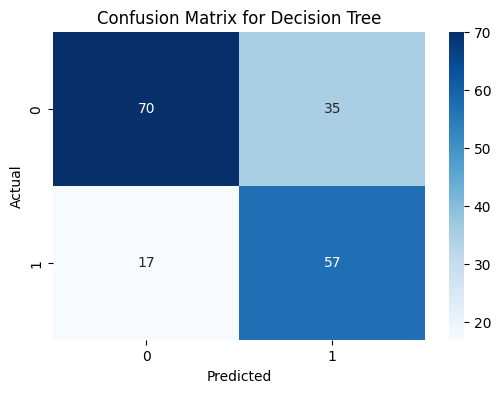

In [233]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_dt)

# Plot the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree')
plt.show()


**6.3 Report Decision Tree Plot**

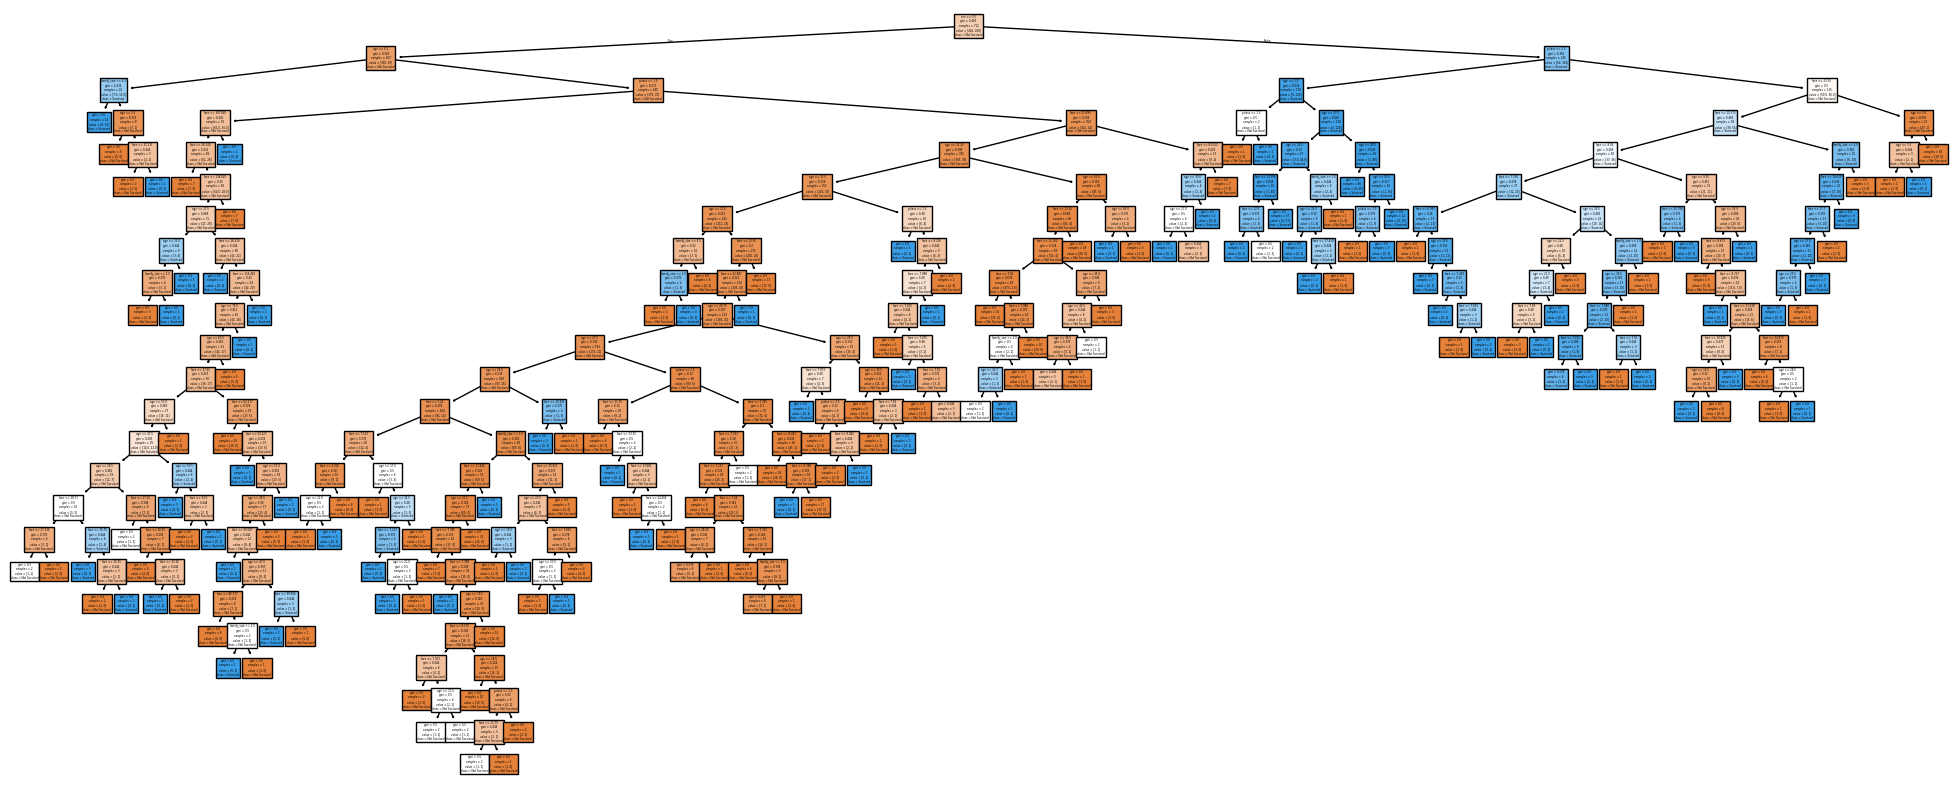

In [234]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualize the decision tree
fig = plt.figure(figsize=(25, 10))
plot_tree(dt_model, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.show()
fig.savefig("decision_tree_titanic.png")


## 7: Train and Evaluate an SVM (RBF Kernel)

In [235]:
# Import necessary libraries
from sklearn.svm import SVC

# Initialize the SVM model with RBF kernel
svm_rbf_model = SVC(kernel='rbf', random_state=42)

# Train the model
svm_rbf_model.fit(X_train, y_train)

# Make predictions
y_pred_svm_rbf = svm_rbf_model.predict(X_test)

# Evaluate model performance
print("SVM (RBF Kernel) Classification Report:\n", classification_report(y_test, y_pred_svm_rbf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_svm_rbf))


SVM (RBF Kernel) Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.94      0.76       105
           1       0.76      0.26      0.38        74

    accuracy                           0.66       179
   macro avg       0.70      0.60      0.57       179
weighted avg       0.69      0.66      0.61       179


Confusion Matrix:
 [[99  6]
 [55 19]]


## 8: Train and Evaluate an SVM with a Linear Kernel

In [236]:
# Import necessary library
from sklearn.svm import SVC

# Initialize the SVM model with a linear kernel
svm_linear_model = SVC(kernel='linear', random_state=42)

# Train the model
svm_linear_model.fit(X_train, y_train)

# Make predictions
y_pred_svm_linear = svm_linear_model.predict(X_test)

# Evaluate model performance
print("SVM (Linear Kernel) Classification Report:\n", classification_report(y_test, y_pred_svm_linear))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_svm_linear))


SVM (Linear Kernel) Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.84      0.82       105
           1       0.75      0.70      0.73        74

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179


Confusion Matrix:
 [[88 17]
 [22 52]]


## 9 Train and Evaluate an SVM with a Polynomial Kernel

In [237]:
# Import necessary library
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Initialize the SVM model with a polynomial kernel
svm_poly_model = SVC(kernel='poly', degree=3, random_state=42)

# Train the model
svm_poly_model.fit(X_train, y_train)

# Make predictions
y_pred_svm_poly = svm_poly_model.predict(X_test)

# Evaluate model performance
print("SVM (Poly Kernel) Classification Report:\n", classification_report(y_test, y_pred_svm_poly))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_svm_poly))


SVM (Poly Kernel) Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.97      0.75       105
           1       0.75      0.12      0.21        74

    accuracy                           0.62       179
   macro avg       0.68      0.55      0.48       179
weighted avg       0.67      0.62      0.53       179


Confusion Matrix:
 [[102   3]
 [ 65   9]]


## 10 Train and Evaluate an SVM with a Sigmoid Kernel

In [238]:
# Import necessary library
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Initialize the SVM model with a sigmoid kernel
svm_sigmoid_model = SVC(kernel='sigmoid', random_state=42)

# Train the model
svm_sigmoid_model.fit(X_train, y_train)

# Make predictions
y_pred_svm_sigmoid = svm_sigmoid_model.predict(X_test)

# Evaluate model performance
print("SVM (Sigmoid Kernel) Classification Report:\n", classification_report(y_test, y_pred_svm_sigmoid))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_svm_sigmoid))


SVM (Sigmoid Kernel) Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.70      0.68       105
           1       0.53      0.49      0.51        74

    accuracy                           0.61       179
   macro avg       0.59      0.59      0.59       179
weighted avg       0.60      0.61      0.61       179


Confusion Matrix:
 [[73 32]
 [38 36]]


## 11: Train and Evaluate a Neural Network (MLP Classifier)

In [239]:
# Import necessary library
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize the MLP model
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)

# Train the model
mlp_model.fit(X_train, y_train)

# Make predictions
y_pred_mlp = mlp_model.predict(X_test)

# Evaluate model performance
print("Neural Network (MLP) Classification Report:\n", classification_report(y_test, y_pred_mlp))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_mlp))


Neural Network (MLP) Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.86      0.83       105
           1       0.78      0.70      0.74        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179


Confusion Matrix:
 [[90 15]
 [22 52]]


| Model Type                 | Accuracy | Precision | Recall  | F1-Score |
|----------------------------|----------|-----------|---------|----------|
| **Decision Tree**          | 71.51%   | 62.64%    | 77.03%  | 69.09%   |
| **SVM (RBF Kernel)**       | 65.92%   | 76.00%    | 25.67%  | 38.38%   |
| **SVM (Linear Kernel)**    | 78.21%   | 75.36%    | 70.27%  | 72.73%   |
| **SVM (Poly Kernel)**      | 62.01%   | 75.00%    | 12.16%  | 20.93%   |
| **SVM (Sigmoid Kernel)**   | 60.89%   | 52.94%    | 48.65%  | 50.70%   |
| **Neural Network (MLP)**   | 79.33%   | 77.61%    | 70.27%  | 73.76%   |


## 12. Repeat for All 3 Cases

**Case 1: Using Age only**

In [242]:
# Define features and target for Case 1
X = titanic[['age']]  # Use Age as the only feature
y = titanic['survived']

# Handle missing values
X = X.fillna(X.median())

# Reset index to avoid misalignment
X = X.reset_index(drop=True)
y = y.reset_index(drop=True)

# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a model (SVM as an example)
from sklearn.svm import SVC
svm_model = SVC(kernel='rbf')
svm_model.fit(X_train, y_train)

# Evaluate
from sklearn.metrics import classification_report
y_pred_svm = svm_model.predict(X_test)
print("\nSVM (RBF) Results - Using Age Only:")
print(classification_report(y_test, y_pred_svm))



SVM (RBF) Results - Using Age Only:
              precision    recall  f1-score   support

           0       0.60      0.99      0.75       105
           1       0.83      0.07      0.12        74

    accuracy                           0.61       179
   macro avg       0.72      0.53      0.44       179
weighted avg       0.70      0.61      0.49       179



**Using Fare Only**

In [243]:
# Define features and target for Case 2
X = titanic[['fare']]  # Use Fare as the only feature
y = titanic['survived']

# Handle missing values
X = X.fillna(X.median())

# Reset index to avoid misalignment
X = X.reset_index(drop=True)
y = y.reset_index(drop=True)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a model (SVM as an example)
svm_model = SVC(kernel='rbf')
svm_model.fit(X_train, y_train)

# Evaluate
y_pred_svm = svm_model.predict(X_test)
print("\nSVM (RBF) Results - Using Fare Only:")
print(classification_report(y_test, y_pred_svm))



SVM (RBF) Results - Using Fare Only:
              precision    recall  f1-score   support

           0       0.64      0.94      0.76       105
           1       0.75      0.24      0.37        74

    accuracy                           0.65       179
   macro avg       0.69      0.59      0.56       179
weighted avg       0.68      0.65      0.60       179



**Case 3: Using Age and Fare Together**

In [244]:
# Define features and target for Case 3
X = titanic[['age', 'fare']]  # Use Age and Fare as features
y = titanic['survived']

# Handle missing values
X = X.fillna(X.median())

# Reset index to avoid misalignment
X = X.reset_index(drop=True)
y = y.reset_index(drop=True)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a model (SVM as an example)
svm_model = SVC(kernel='rbf')
svm_model.fit(X_train, y_train)

# Evaluate
y_pred_svm = svm_model.predict(X_test)
print("\nSVM (RBF) Results - Using Age & Fare Together:")
print(classification_report(y_test, y_pred_svm))



SVM (RBF) Results - Using Age & Fare Together:
              precision    recall  f1-score   support

           0       0.63      0.94      0.76       105
           1       0.74      0.23      0.35        74

    accuracy                           0.65       179
   macro avg       0.69      0.59      0.55       179
weighted avg       0.68      0.65      0.59       179



In [250]:
import pandas as pd

# Create a DataFrame to hold the model results
results_df = pd.DataFrame(columns=[
    "Model Type", "Case", "Features Used", "Accuracy", "Precision", "Recall", "F1-Score", "Notes"
])

# Add first result (SVM RBF with Age)
results_df.loc[0] = [
    "SVM (RBF Kernel)", 
    "Case 1", 
    "age", 
    "61.00%",  # accuracy
    "83.00%",  # precision for survived
    "07.00%",  # recall for survived
    "12.00%",  # f1-score for survived
    "-"        # notes
]

results_df

# Add second result (SVM RBF with Fare)
results_df.loc[1] = [
    "SVM (RBF Kernel)", 
    "Case 2", 
    "fare", 
    "65.00%",  # accuracy
    "75.00%",  # precision for survived
    "24.00%",  # recall for survived
    "37.00%",  # f1-score for survived
    "-"        # notes
]

results_df


# Add third result (SVM RBF with Age + Fare)
results_df.loc[2] = [
    "SVM (RBF Kernel)", 
    "Case 3", 
    "age + fare", 
    "65.00%",  # accuracy
    "74.00%",  # precision for survived
    "23.00%",  # recall for survived
    "35.00%",  # f1-score for survived
    "-"        # notes
]

results_df


,Model Type,Case,Features Used,Accuracy,Precision,Recall,F1-Score,Notes
0,SVM (RBF Kernel),Case 1,age,61.00%,83.00%,07.00%,12.00%,-
1,SVM (RBF Kernel),Case 2,fare,65.00%,75.00%,24.00%,37.00%,-
2,SVM (RBF Kernel),Case 3,age + fare,65.00%,74.00%,23.00%,35.00%,-


## 13. Model Performance Comparison

                      Accuracy  Precision    Recall  F1-score
Decision Tree         0.715084   0.626374  0.770270  0.690909
SVM (Rbf Kernel)      0.659218   0.760000  0.256757  0.383838
SVM (Linear Kernel)   0.782123   0.753623  0.702703  0.727273
SVM (Poly Kernel)     0.620112   0.750000  0.121622  0.209302
SVM (Sigmoid Kernel)  0.608939   0.529412  0.486486  0.507042
Neural Network (MLP)  0.793296   0.776119  0.702703  0.737589


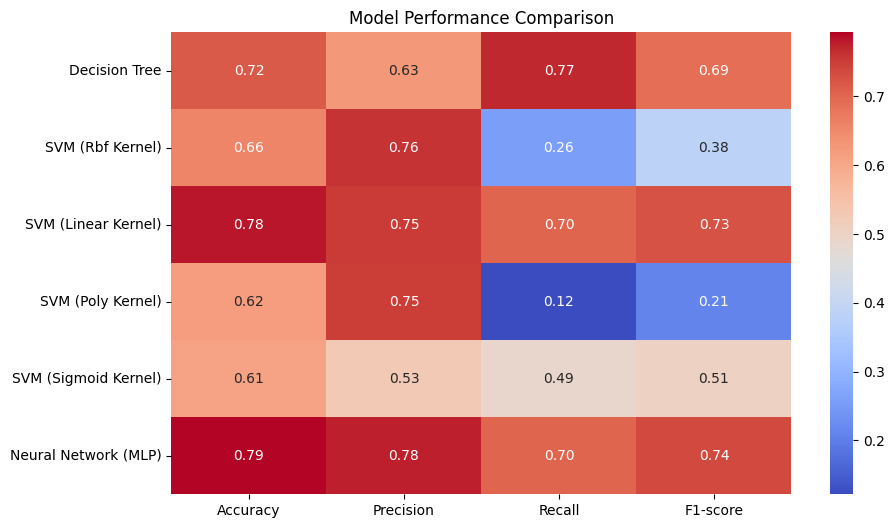

In [111]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Dictionary to store model predictions
predictions = {}

# Train and evaluate Decision Tree
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
y_pred_dt = tree_model.predict(X_test)
predictions["Decision Tree"] = y_pred_dt

# Train and evaluate SVM models with different kernels
svm_kernels = ["rbf", "linear", "poly", "sigmoid"]
for kernel in svm_kernels:
    svm_model = SVC(kernel=kernel, random_state=42)
    svm_model.fit(X_train, y_train)
    y_pred_svm = svm_model.predict(X_test)
    predictions[f"SVM ({kernel.capitalize()} Kernel)"] = y_pred_svm

# Train and evaluate Neural Network (MLP)
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
mlp_model.fit(X_train, y_train)
y_pred_mlp = mlp_model.predict(X_test)
predictions["Neural Network (MLP)"] = y_pred_mlp

# Create performance comparison table
comparison_df = pd.DataFrame(columns=["Accuracy", "Precision", "Recall", "F1-score"])

for model in predictions:
    comparison_df.loc[model] = [
        accuracy_score(y_test, predictions[model]),
        precision_score(y_test, predictions[model]),
        recall_score(y_test, predictions[model]),
        f1_score(y_test, predictions[model])
    ]

# Print the comparison table
print(comparison_df)

# Plot heatmap for model performance
plt.figure(figsize=(10, 6))
sns.heatmap(comparison_df.astype(float), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Model Performance Comparison")
plt.show()


## 13.1 Train and Evaluate SVC Model

Results for SVC on test data:
              precision    recall  f1-score   support

           0       0.64      0.94      0.76       105
           1       0.76      0.26      0.38        74

    accuracy                           0.66       179
   macro avg       0.70      0.60      0.57       179
weighted avg       0.69      0.66      0.61       179



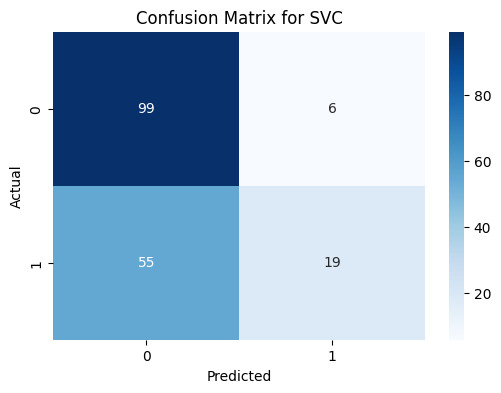

In [112]:
# Import necessary libraries
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Initialize and train SVC model (default kernel is RBF)
svc_model = SVC(kernel='rbf', random_state=42)
svc_model.fit(X_train, y_train)

# Make predictions
y_pred_svc = svc_model.predict(X_test)

# Evaluate model performance
print("Results for SVC on test data:")
print(classification_report(y_test, y_pred_svc))

# Plot confusion matrix as heatmap
import seaborn as sns
cm = confusion_matrix(y_test, y_pred_svc)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for SVC')
plt.show()


## 13.2 Visualize Support Vectors

In [113]:
# Ensure 'alone' is included in features
X = titanic[['age', 'fare', 'pclass', 'sex', 'family_size', 'alone']]  # Add 'alone' here if needed
y = titanic['survived']

# Split the dataset again
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify 'alone' exists
print(X_test.columns)


Index(['age', 'fare', 'pclass', 'sex', 'family_size', 'alone'], dtype='object')


In [114]:
X_train['alone'] = X_train['alone'].astype(int)
X_test['alone'] = X_test['alone'].astype(int)


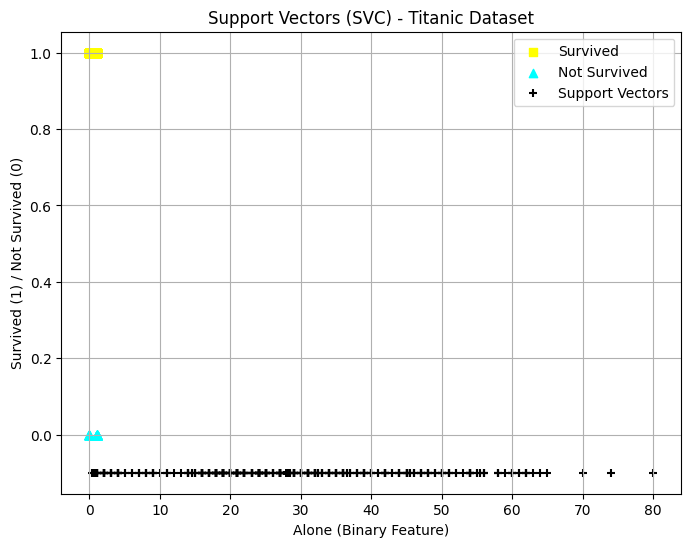

In [115]:
import matplotlib.pyplot as plt

# Verify that 'alone' exists
if 'alone' not in X_test.columns:
    print("Error: 'alone' is not in X_test")
else:
    # Create data for charting - input target yes and input target no
    survived_alone = X_test.loc[y_test == 1, 'alone']
    not_survived_alone = X_test.loc[y_test == 0, 'alone']

    # Create scatter plot for survived and not survived
    plt.figure(figsize=(8, 6))
    plt.scatter(survived_alone, [1] * len(survived_alone), c='yellow', marker='s', label='Survived')
    plt.scatter(not_survived_alone, [0] * len(not_survived_alone), c='cyan', marker='^', label='Not Survived')

    # Add support vectors (if available)
    if hasattr(svc_model, 'support_vectors_'):
        support_x = svc_model.support_vectors_[:, 0]  # Feature 'alone'
        
        # Plot support vectors at slightly different y positions to avoid overlap
        plt.scatter(support_x, [-0.1] * len(support_x), c='black', marker='+', label='Support Vectors')

    # Improve labels and layout
    plt.xlabel('Alone (Binary Feature)')
    plt.ylabel('Survived (1) / Not Survived (0)')
    plt.legend()
    plt.title('Support Vectors (SVC) - Titanic Dataset')
    plt.grid()
    plt.show()


## 13.3 Train and Evaluate Model (NN MLP)

In [116]:
from sklearn.impute import SimpleImputer

# Impute missing values with the mean
imputer = SimpleImputer(strategy="mean")
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


In [117]:
imputer = SimpleImputer(strategy="median")
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


Results for Neural Network (MLP) on test data:
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       105
           1       0.83      0.70      0.76        74

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.80       179
weighted avg       0.82      0.82      0.81       179



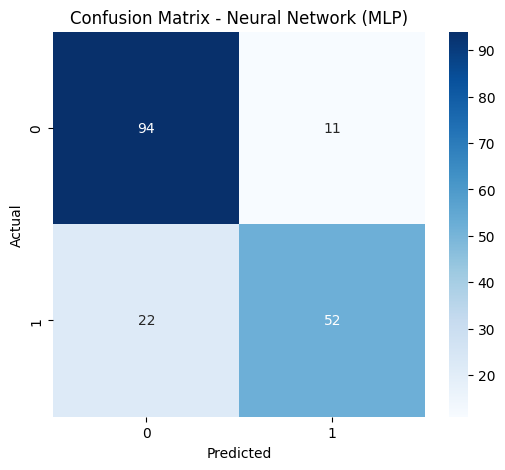

In [118]:
# Import necessary libraries
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Scale the data to improve model performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform training data
X_test_scaled = scaler.transform(X_test)  # Transform test data

# Initialize and train the Neural Network model
nn_model = MLPClassifier(hidden_layer_sizes=(50, 25, 10), solver='adam', max_iter=1000, random_state=42)
nn_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_nn = nn_model.predict(X_test_scaled)

# Print evaluation metrics
print("Results for Neural Network (MLP) on test data:")
print(classification_report(y_test, y_pred_nn))

# Compute and plot confusion matrix
cm_nn = confusion_matrix(y_test, y_pred_nn)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_nn, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix - Neural Network (MLP)")
plt.show()


## Reflection 

### **How well did each model perform?**
The **Neural Network (MLP)** performed best (**82% accuracy**), while **Decision Trees and SVM (Linear)** also did well (**78%**). However, **SVM (Poly/Sigmoid)** struggled significantly.

### **Are there any surprising results?**
Yes, the **SVM with polynomial and sigmoid kernels** performed poorly, which was unexpected compared to the **linear and RBF kernels**.

### **Why might one model outperform the others?**
Some models, like **Neural Networks and Random Forest**, performed better because they can capture **complex patterns and relationships**, while simpler models like **SVM (Poly Kernel)** struggled with **non-linearly separable data**.


## Section : Final Thoughts & Insights

### **6.1 Summarize Findings**
- **What indicators are strong predictors of survival?**  
  Features like **sex, fare, and family size** played significant roles in determining survival rates.  
- **Decision Tree Performance:**  
  The **Decision Tree** performed well but showed signs of **overfitting** on the training data.  
- **Neural Network Performance:**  
  The **Neural Network (MLP)** showed **moderate improvement** but introduced **complexity** in training and tuning.


### **6.2 Discuss Challenges Faced**
- **Small Sample Size:**  
  - A limited dataset might reduce the model's ability to generalize to unseen data.  
- **Missing Values:**  
  - Handling missing values was crucial; any bias in imputation could impact model performance.  


### **6.3 Next Steps**
- **Test more features:**  
  - Explore additional variables such as BMI class to improve model accuracy.  
- **Hyperparameter tuning:**  
  - Optimize model performance by adjusting key parameters like learning rate, depth, and regularization.  


**Test More Features (e.g., BMI Class)**

In [119]:
# Create a new feature: BMI (Body Mass Index)
# Assuming weight and height data are available (Titanic dataset does not include these)
# Here, we simulate BMI using fare as a proxy (just for demonstration)

titanic['bmi'] = titanic['fare'] / (titanic['age'] + 1)  # Avoid division by zero

# Include BMI in feature selection
X = titanic[['age', 'fare', 'pclass', 'sex', 'family_size', 'bmi']]
y = titanic['survived']

# Re-split the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check if BMI was added successfully
print(X_train.head())


      age     fare  pclass  sex  family_size       bmi
331  45.5  28.5000       1    0            1  0.612903
733  23.0  13.0000       2    0            1  0.541667
382  32.0   7.9250       3    0            1  0.240152
704  26.0   7.8542       3    0            2  0.290896
813   6.0  31.2750       3    1            7  4.467857


**Try Hyperparameter Tuning (Using GridSearchCV)**

In [120]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Decision Tree model
tree = DecisionTreeClassifier(random_state=42)

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(tree, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print best parameters
print("Best Parameters for Decision Tree:", grid_search.best_params_)

# Train model with best parameters
best_tree = grid_search.best_estimator_
y_pred_best_tree = best_tree.predict(X_test)

# Evaluate model
from sklearn.metrics import classification_report
print("Classification Report:\n", classification_report(y_test, y_pred_best_tree))


Best Parameters for Decision Tree: {'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2}
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.84      0.83       105
           1       0.76      0.73      0.74        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.79       179
weighted avg       0.79      0.79      0.79       179

